In [ ]:
import pandas as pd
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import string



In [ ]:
# Descargar stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))

In [ ]:
df = pd.read_csv('scopus.csv')
df.head(101)

,Authors,Author full names,Author(s) ID,Title,Source title,Link,Abstract,Index Keywords,Open Access
0,Nerín-Fonz F.; Caprai C.; Morales-Pastor A.; L...,"Nerín-Fonz, Francho (57225981443); Caprai, Cam...",57225981443; 59012356300; 57198427341; 5816354...,AlloViz: A tool for the calculation and visual...,Computational and Structural Biotechnology Jou...,https://www.scopus.com/inward/record.uri?eid=2...,"Allostery, the presence of functional interact...",Amino acids; Data visualization; Molecular bio...,NaN
1,Stiebe M.,"Stiebe, Michael (59139253600)",59139253600,Social big data mining for the sustainable mob...,European Transport Research Review,https://www.scopus.com/inward/record.uri?eid=2...,The paper reports findings from a study that e...,Carbon; Data mining; Object detection; Python;...,All Open Access; Gold Open Access
2,Chen H.; Xiao M.,"Chen, Huayong (58698500400); Xiao, Mimi (58288...",58698500400; 58288566400,Seasonality of influenza-like illness and shor...,BMC Infectious Diseases,https://www.scopus.com/inward/record.uri?eid=2...,Background: Influenza-like illness (ILI) impos...,"Adolescent; Adult; Aged; Child; Child, Prescho...",All Open Access; Gold Open Access
3,Cai W.; Ding S.; Li H.; Zhou X.; Dou W.; Zhou ...,"Cai, Wenwen (58303650000); Ding, Shouliang (57...",58303650000; 57216708482; 58947821800; 5722654...,Automatic IMRT treatment planning through flue...,Radiation Oncology,https://www.scopus.com/inward/record.uri?eid=2...,"Background: At present, the implementation of ...",Humans; Nasopharyngeal Carcinoma; Nasopharynge...,All Open Access; Gold Open Access
4,Liu L.; Zhao L.; Jing Y.; Li D.; Linghu H.; Wa...,"Liu, Li (56505767400); Zhao, Ling (57745315500...",56505767400; 57745315500; 57912473700; 5614937...,Exploring a multiparameter MRI–based radiomics...,Insights into Imaging,https://www.scopus.com/inward/record.uri?eid=2...,Objectives: To develop a multiparameter magnet...,CA 125 antigen; gadolinium pentetate meglumine...,All Open Access; Gold Open Access
...,...,...,...,...,...,...,...,...,...
96,Lilhore U.K.; Dalal S.; Faujdar N.; Margala M....,"Lilhore, Umesh Kumar (55445409800); Dalal, Sur...",55445409800; 57190939535; 56910217600; 7003531...,Correction to: Hybrid CNN-LSTM model with effi...,Scientific Reports,https://www.scopus.com/inward/record.uri?eid=2...,Correction to: Scientific Reportshttps://doi.o...,aged; algorithm; area under the curve; article...,All Open Access; Gold Open Access
97,Vázquez-González L.; Regueira-Iglesias A.; Bal...,"Vázquez-González, Lara (57268445900); Regueira...",57268445900; 57195325927; 57063526500; 5720549...,PrimerEvalPy: a tool for in-silico evaluation ...,BMC Bioinformatics,https://www.scopus.com/inward/record.uri?eid=2...,Background: The selection of primer pairs in s...,Archaea; Bacteria; Computer Simulation; DNA Pr...,All Open Access; Gold Open Access
98,Allwright M.; Guennewig B.; Hoffmann A.E.; Roh...,"Allwright, Michael (57218290540); Guennewig, B...",57218290540; 55178539600; 58752759500; 5592844...,ReTimeML: a retention time predictor that supp...,Scientific Reports,https://www.scopus.com/inward/record.uri?eid=2...,The analysis of ceramide (Cer) and sphingomyel...,"Ceramides; Chromatography, Liquid; Humans; Liq...",All Open Access; Gold Open Access
99,Barzegar Khanghah A.; Fernie G.; Roshan Fekr A.,"Barzegar Khanghah, Ali (58100183800); Fernie, ...",58100183800; 7004125488; 41861326300,Joint angle estimation during shoulder abducti...,BioMedical Engineering Online,https://www.scopus.com/inward/record.uri?eid=2...,"Background: Tele-rehabilitation, also known as...",Biomechanical Phenomena; Female; Humans; Male;...,All Open Access; Gold Open Access


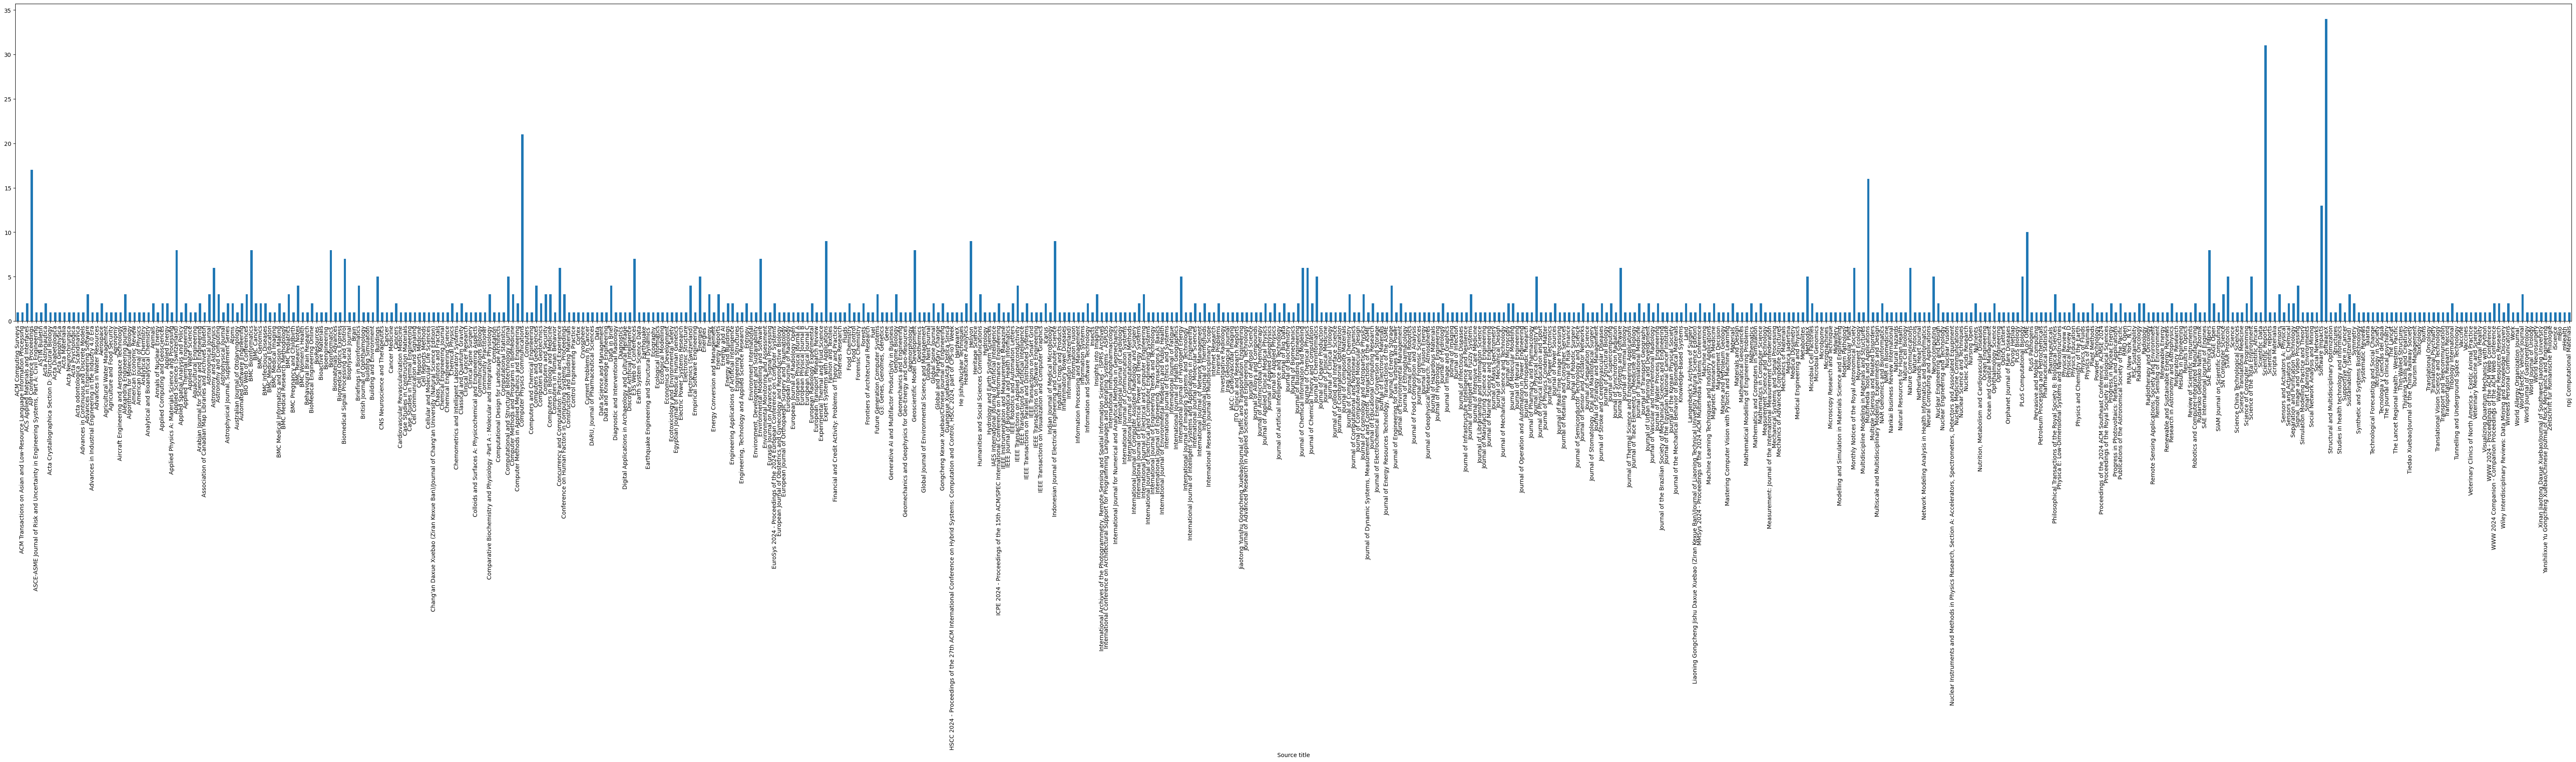

In [ ]:
grouped = df.groupby('Source title')['Title'].count()
plt.figure(figsize=(80, 10))
grouped.plot(kind='bar')
plt.show()

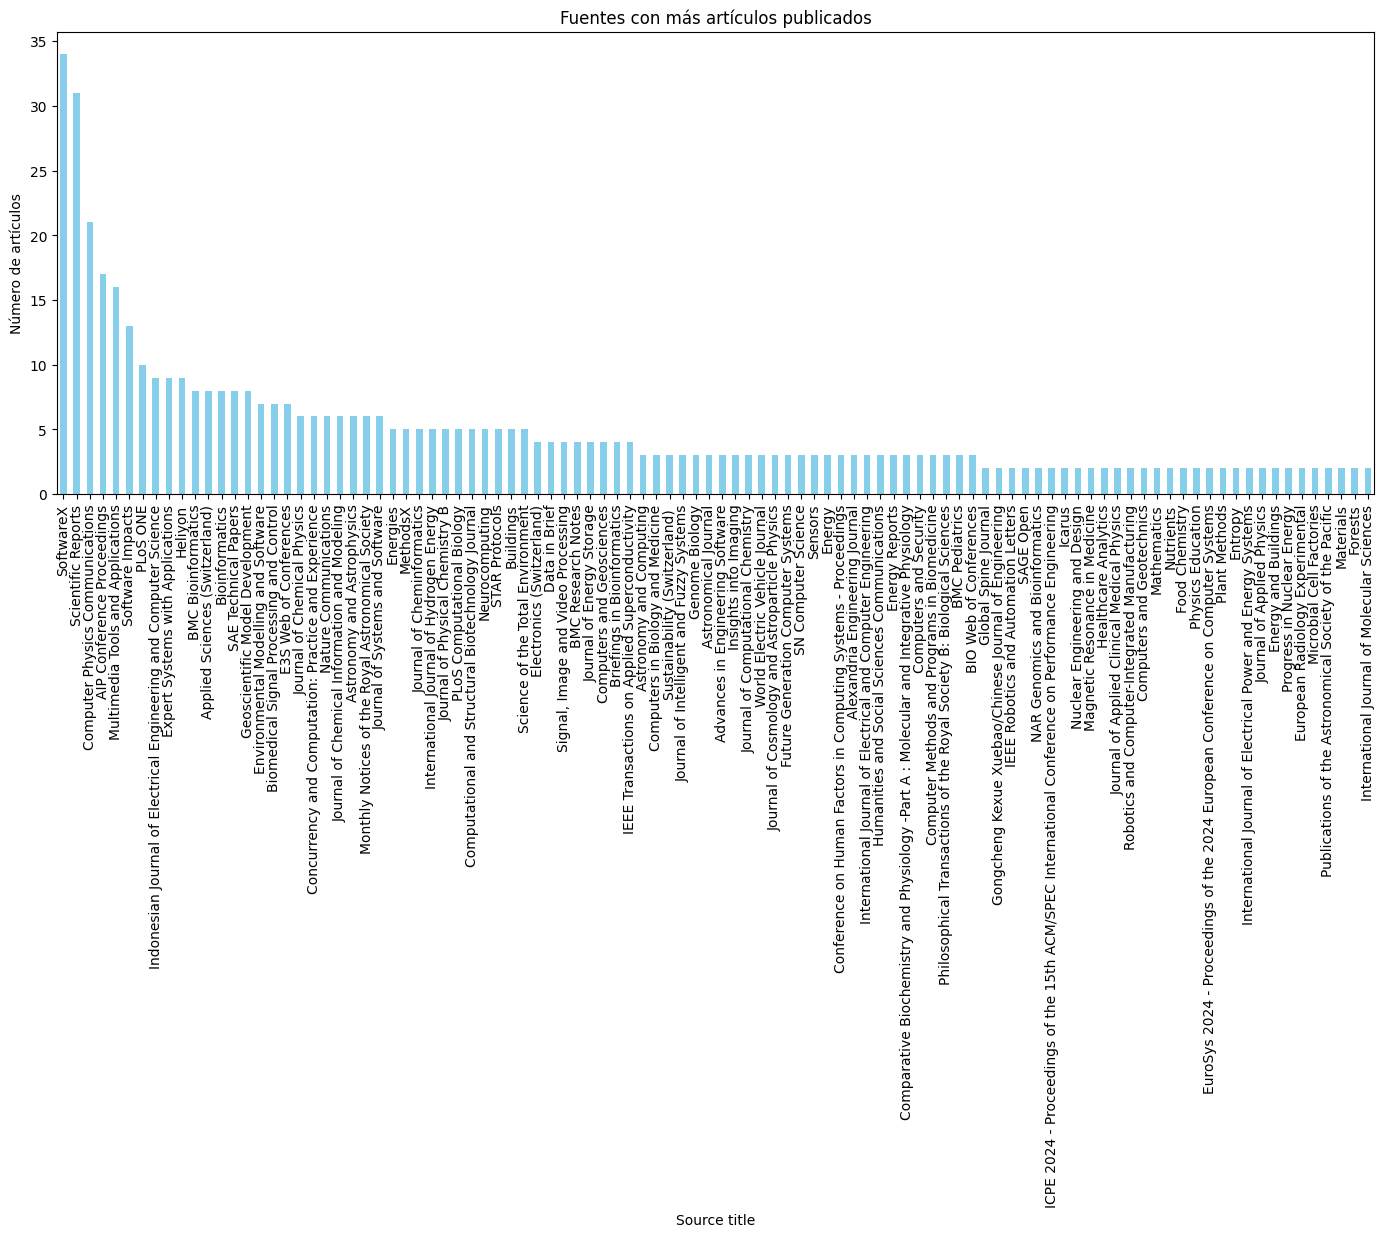

In [ ]:
grouped = df.groupby('Source title')['Title'].count().sort_values(ascending=False)
top_sources = grouped.head(100)
plt.figure(figsize=(17, 6))
top_sources.plot(kind='bar', color='skyblue')
plt.title('Fuentes con más artículos publicados')
plt.xlabel('Source title')
plt.ylabel('Número de artículos')
plt.show()

In [ ]:
# Función para limpiar y preparar texto
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return ' '.join([word for word in text.split() if word not in stop_words])

# Analizar Titulos

In [ ]:
# Aplicar la limpieza de texto a los títulos
df['clean_title'] = df['Title'].apply(clean_text)

# Contar palabras en todos los títulos
word_counts = Counter()
df['clean_title'].str.split().apply(word_counts.update)

# Crear un DataFrame a partir del contador de palabras
word_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])

# Ordenar las palabras por frecuencia de aparición, de mayor a menor
word_df = word_df.sort_values(by='Frequency', ascending=False).reset_index(drop=True)

# Añadir columna de rank
word_df['Rank'] = word_df['Frequency'].rank(method='dense', ascending=False)

# Mostrar el DataFrame de palabras ordenadas por rango
word_df.head(20)

,Word,Frequency,Rank
0,using,151,1.0
1,learning,122,2.0
2,analysis,119,3.0
3,python,95,4.0
4,data,86,5.0
5,based,83,6.0
6,machine,80,7.0
7,model,74,8.0
8,deep,66,9.0
9,study,65,10.0


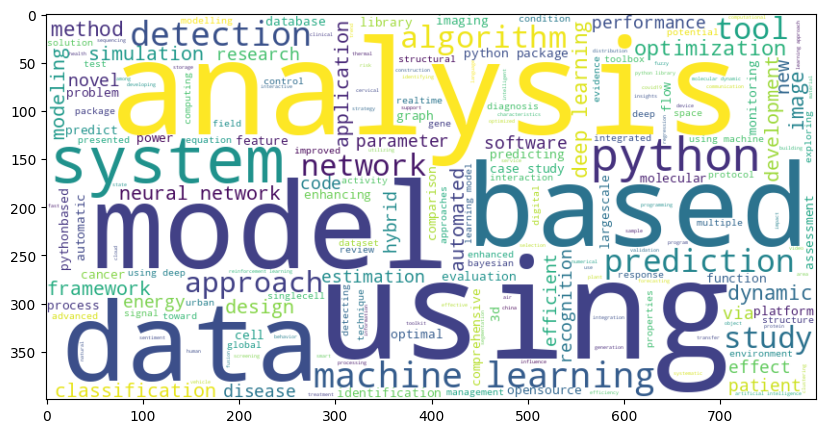

In [ ]:
# Aplicar la limpieza de texto a los títulos
df['clean_title'] = df['Title'].apply(clean_text)

# Concatenar todos los títulos limpios en un solo texto
text = ' '.join(df['clean_title'])

wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('on')
plt.show()

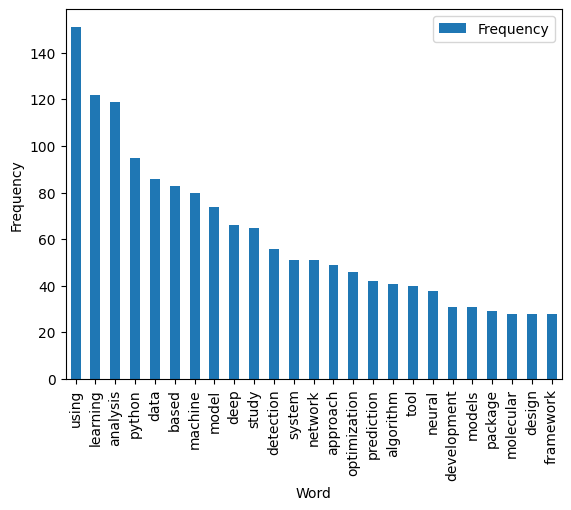

In [ ]:
import matplotlib.pyplot as plt
word_df.sort_values(by='Frequency', ascending=False).head(25).plot(x='Word', y='Frequency', kind='bar')
plt.xlabel('Word')
_ = plt.ylabel('Frequency')

<ipython-input-14-5492a4065ecb>:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama


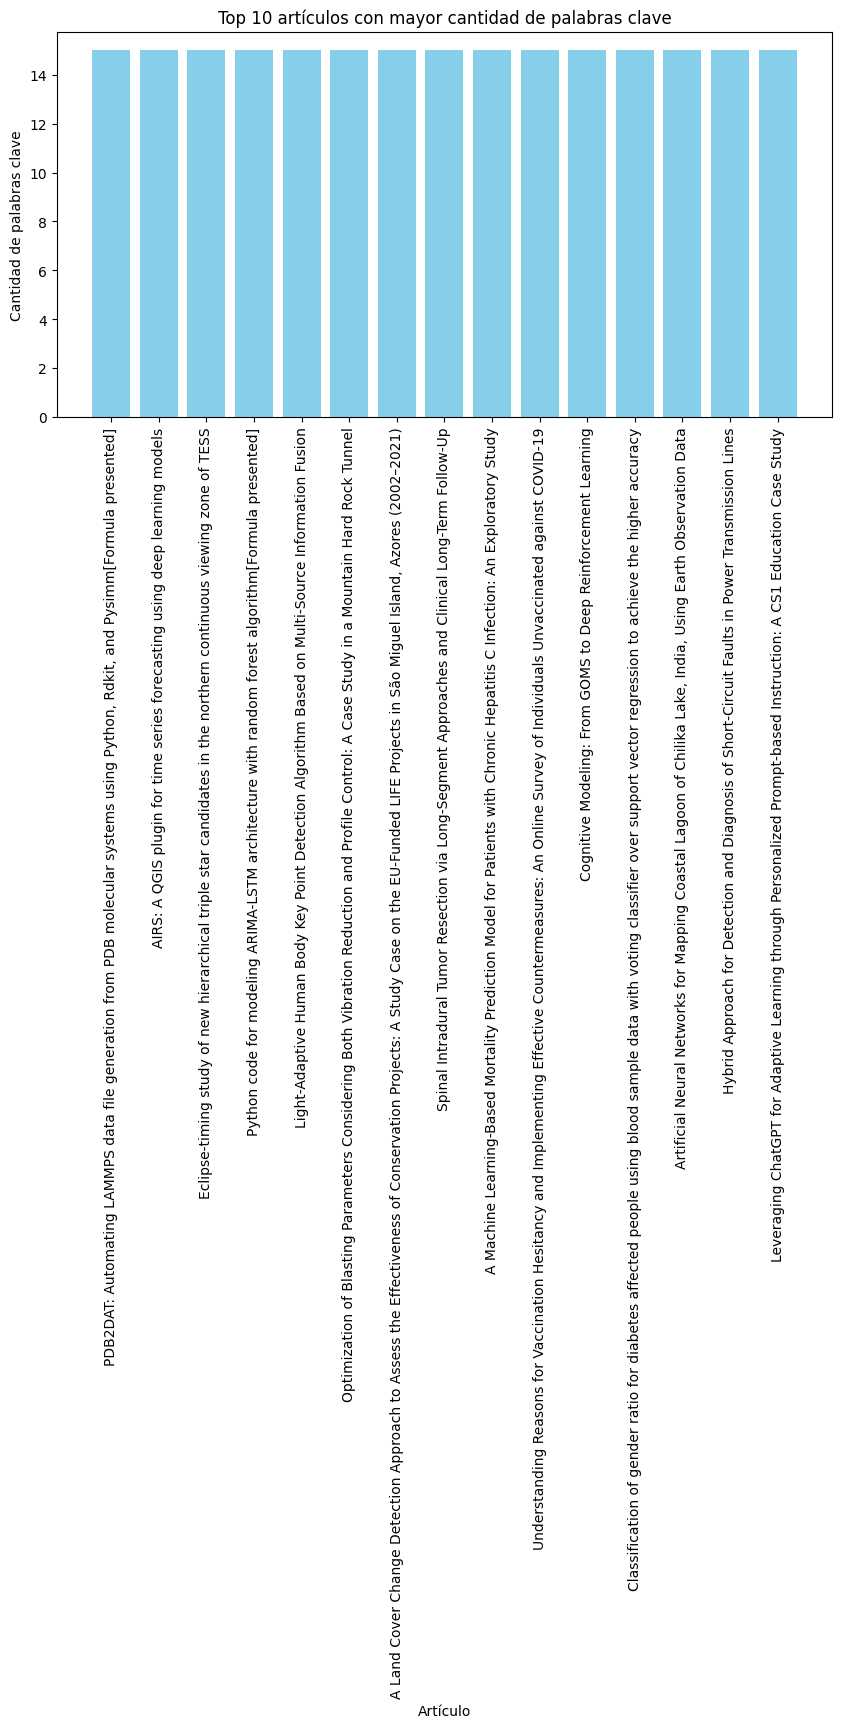

In [ ]:
# Contar palabras en todos los títulos
word_counts = Counter()
df['Title'].apply(lambda title: word_counts.update(clean_text(title)))

# Determinar un número de palabras clave a considerar (e.g., top 10)
num_keywords = 15
keywords = [word for word, count in word_counts.most_common(num_keywords)]

# Función para contar cuántas palabras clave contiene cada título
def count_keywords(title):
    words = clean_text(title)
    return sum(word in words for word in keywords)

# Contar las palabras clave por título
df['keyword_count'] = df['Title'].apply(count_keywords)

# Ordenar el DataFrame por 'keyword_count' de forma descendente
df_sorted = df.sort_values(by='keyword_count', ascending=False)

# Graficar los top 10 artículos con más palabras clave
plt.figure(figsize=(10, 5))
plt.bar(df_sorted['Title'].head(15), df_sorted['keyword_count'].head(15), color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('Artículo')
plt.ylabel('Cantidad de palabras clave')
plt.title('Top 10 artículos con mayor cantidad de palabras clave')
plt.tight_layout()  # Ajusta automáticamente los parámetros de la subtrama
plt.show()


# ANALIZAR ABSTRACT

In [ ]:


# Seleccionar los abstracts de los artículos con más palabras clave
top_abstracts = df.sort_values(by='keyword_count', ascending=False).head(10)['Abstract']

# Función para resumir un abstract
def summarize_abstract(abstract):
    sentences = sent_tokenize(abstract)
    word_freq = FreqDist(clean_text(abstract))
    scores = {sentence: sum(word_freq[word] for word in word_tokenize(sentence.lower()) if word in word_freq) for sentence in sentences}
    summary_sentences = sorted(scores, key=scores.get, reverse=True)[:3]  # Tomar las 3 oraciones con mayor puntuación
    return ' '.join(summary_sentences)

# Aplicar la función de resumen a cada abstract seleccionado
top_abstracts_summary = top_abstracts.apply(summarize_abstract)

# Mostrar resúmenes
for i, summary in enumerate(top_abstracts_summary, 1):
    print(f"Resumen {i}:\n{summary}\n")


Resumen 1:
© 2024 The Author(s) Pdb2dat, developed in Python, is an open-source, self-contained utility that facilitates the conversion of PDB files into LAMMPS data files, catering to the need of initializing atomistic simulation from initial atomic configurations. It extracts molecular details from PDB files, uses Rdkit and Xyz2mol for bonding analysis and 3D conformer generation, and uses Pysimm for assigning force field types and charges.

Resumen 2:
Nevertheless, there is a critical need for analyzing and identifying effective deep learning models in order to assure the accuracy of forecasting outcomes. This plugin allows time series forecasting using five deep learning models (i.e., FFNN, single LSTM, stacked LSTM, BiLSTM, and Conv-LSTM) and provides a user-friendly tool permitting data processing, model building and training, future prediction, accuracy analysis, and results visualization and saving. © 2024 Elsevier Ltd

Resumen 3:
We compiled a list of more than 3500 eclipsing 

In [ ]:
# Contar la aparición de palabras clave en cada título
df['keyword_count'] = df['Title'].apply(lambda x: sum(word in clean_text(x) for word in word_df))

# Seleccionar los abstracts de los artículos con más palabras clave
top_articles = df.sort_values(by='keyword_count', ascending=False).head(10)

# Función para resumir un abstract
def summarize_abstract(abstract):
    sentences = sent_tokenize(abstract)
    word_freq = FreqDist(clean_text(abstract))
    scores = {sentence: sum(word_freq[word] for word in word_tokenize(sentence.lower()) if word in word_freq) for sentence in sentences}
    summary_sentences = sorted(scores, key=scores.get, reverse=True)[:2]
    return ' '.join(summary_sentences)

# Aplicar la función de resumen a cada abstract seleccionado y almacenar junto con el título
top_articles['Summary'] = top_articles['Abstract'].apply(summarize_abstract)

# Mostrar títulos y resúmenes
for index, row in top_articles.iterrows():
    print(f"Title: {row['Title']}\nSummary: {row['Summary']}\n")


Title: AlloViz: A tool for the calculation and visualisation of protein allosteric communication networks
Summary: We demonstrate the features of AlloViz on two proteins: β-arrestin 1, a key player for regulating G protein-coupled receptor (GPCR) signalling, and the protein tyrosine phosphatase 1B, an important pharmaceutical target for allosteric inhibitors. © 2024 The Author(s)

Title: Wasserstein distance loss function for financial time series deep learning[Formula presented]
Summary: This paper presents user-friendly code for the implementation of a loss function for neural network time series models that exploits the topological structures of financial data. By leveraging the recently-discovered presence of topological features present in financial time series data, the code offers a more effective approach for creating forecasting models for such data given the fact that it allows neural network models to not only learn temporal patterns of the data, but also topological pattern